# HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

## HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

## Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

## Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Dataset Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('HR Project.csv')  
df.head()  

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


By head method we have viewed top 5 rows by which we can get an idea what actual about the dataset,also in which it contains the details of employees working in an organisation.There are different columns in which both the features and label present. 
1.Age:age of the employee 
2.Attrition:employee is attriated or not which means the resignation of an employee from his company due to several reasons. 
3.Business Travel:Employee rarely travels or frequently travels. 
4.Daily Rate:Daily report of a employee. 
5.Department:part or stream the employee working. 
6.Remaining all the features has there own contribution to predict our label.In this the label is Attrition which we need to predict.Since there are two classes in the label it comes under the classification problem.So we need to build our models on the basis of the problem.



In [50]:
df.shape    

(1470, 33)

1470 rows and 35 columns

In [51]:
#set_option function gives the complete information about the features which are hidden
pd.set_option('max_columns',None)

In [4]:
df.columns   

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()   #Checking for null values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see, there are no missing values in the dataset

# Exploratory Data Analysis 

In [7]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

No     1233
Yes     237
Name: Attrition, dtype: int64


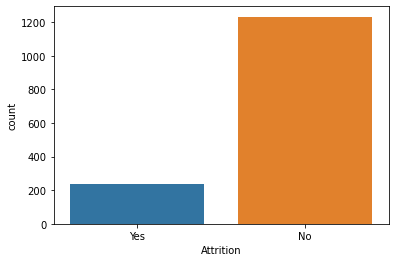

In [8]:
#Checking the number of attritions(Yes/No) in the dataset using value_counts
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition', data=df)  #Plotting the attrition rate using countplot
plt.show()

There are 237 records of employees having attrition and 1233 records of employees are not having attrition

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


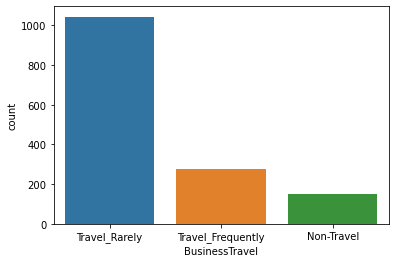

In [9]:
#Checking out BusinessTravel observation
print(df['BusinessTravel'].value_counts())
sns.countplot(x='BusinessTravel',data=df)
plt.show()

There are 1043 employees who do rare travels, 277 employees who travel frequently and 150 employess who don't travel for any business trips

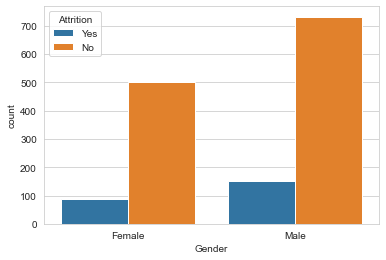

In [10]:
#lets check the attrition based on Gender VAriations
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df,hue='Attrition')
plt.show()

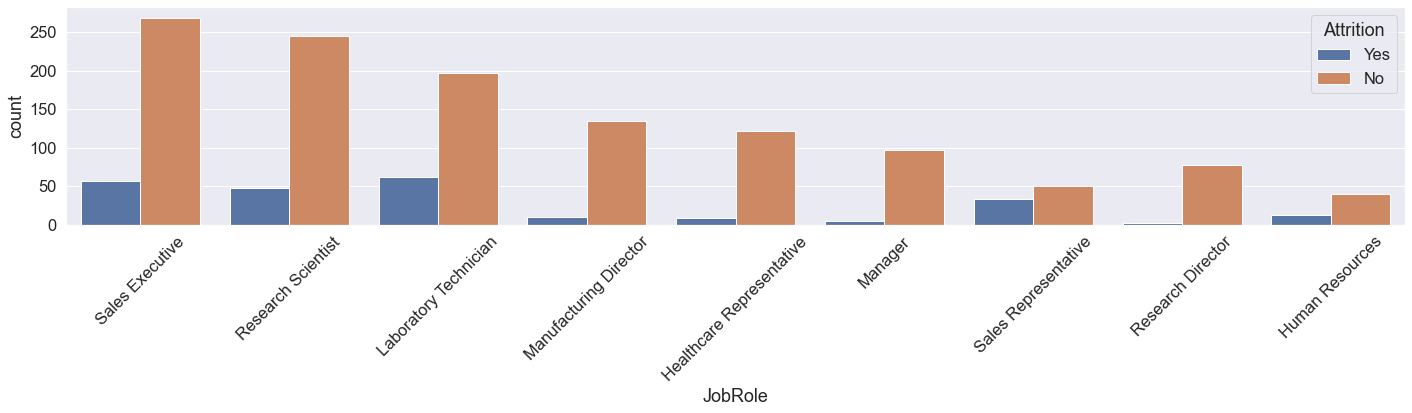

In [11]:
#Lets check the attrition according to role
plt.figure(figsize=(24,4))
sns.set(font_scale=1.5)
sns.countplot(x='JobRole',data=df,hue='Attrition')
plt.xticks(rotation=45)
plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


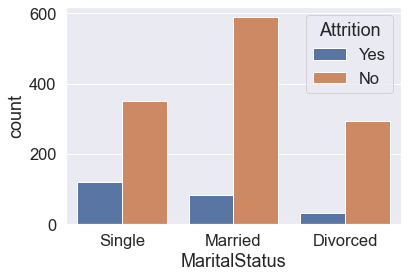

In [12]:
#Lets check the attrition according to Marital Status
print(df['MaritalStatus'].value_counts())
sns.countplot(x='MaritalStatus',data=df,hue='Attrition')
plt.show()

# Bivariate Analysis

Text(0, 0.5, 'DailyRate')

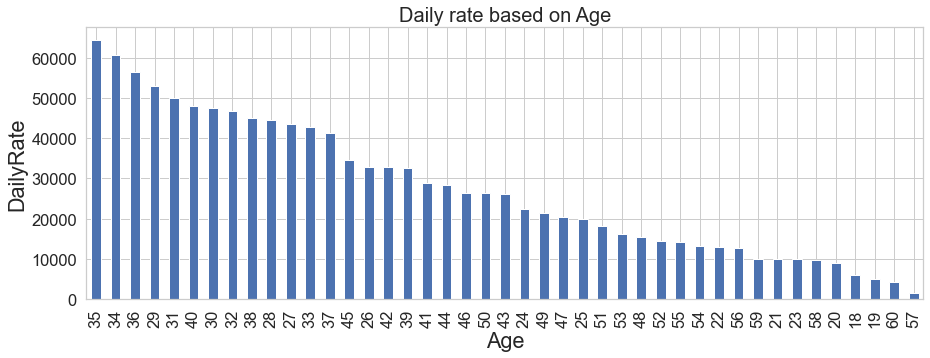

In [13]:
#Lets check ratio of Daily rate based on Different Age
import numpy as np
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
plt.xticks(np.linspace(1,2,5))
plt.title('Daily rate based on Age',{'fontsize':20})
df.groupby('Age')['DailyRate'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.xlabel('Age',{'fontsize' : 'large'})
plt.ylabel('DailyRate',{'fontsize':'large'})

We can see that employees between age 29-40 are getting the highest daily rates and especially the employees aged 35 are getting the highest daily rate among all

Department

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64




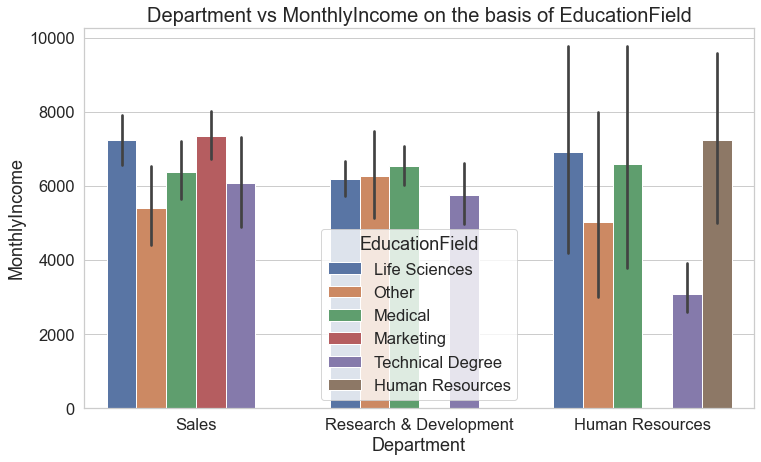

In [14]:
#Lets check Department vs Monthly Income, on the basis of Education Field
plt.figure(figsize=(12,7))
print('Department\n')
print(df['Department'].value_counts())  #Total Department data
print('\n')
print('EducationField\n')
print(df['EducationField'].value_counts())  #Total EducationField data
plt.title('Department vs MonthlyIncome on the basis of EducationField',{'fontsize':20})
print('\n')
sns.barplot(x='Department',y='MonthlyIncome',data=df,hue='EducationField')
plt.show()

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='MonthlyIncome'>

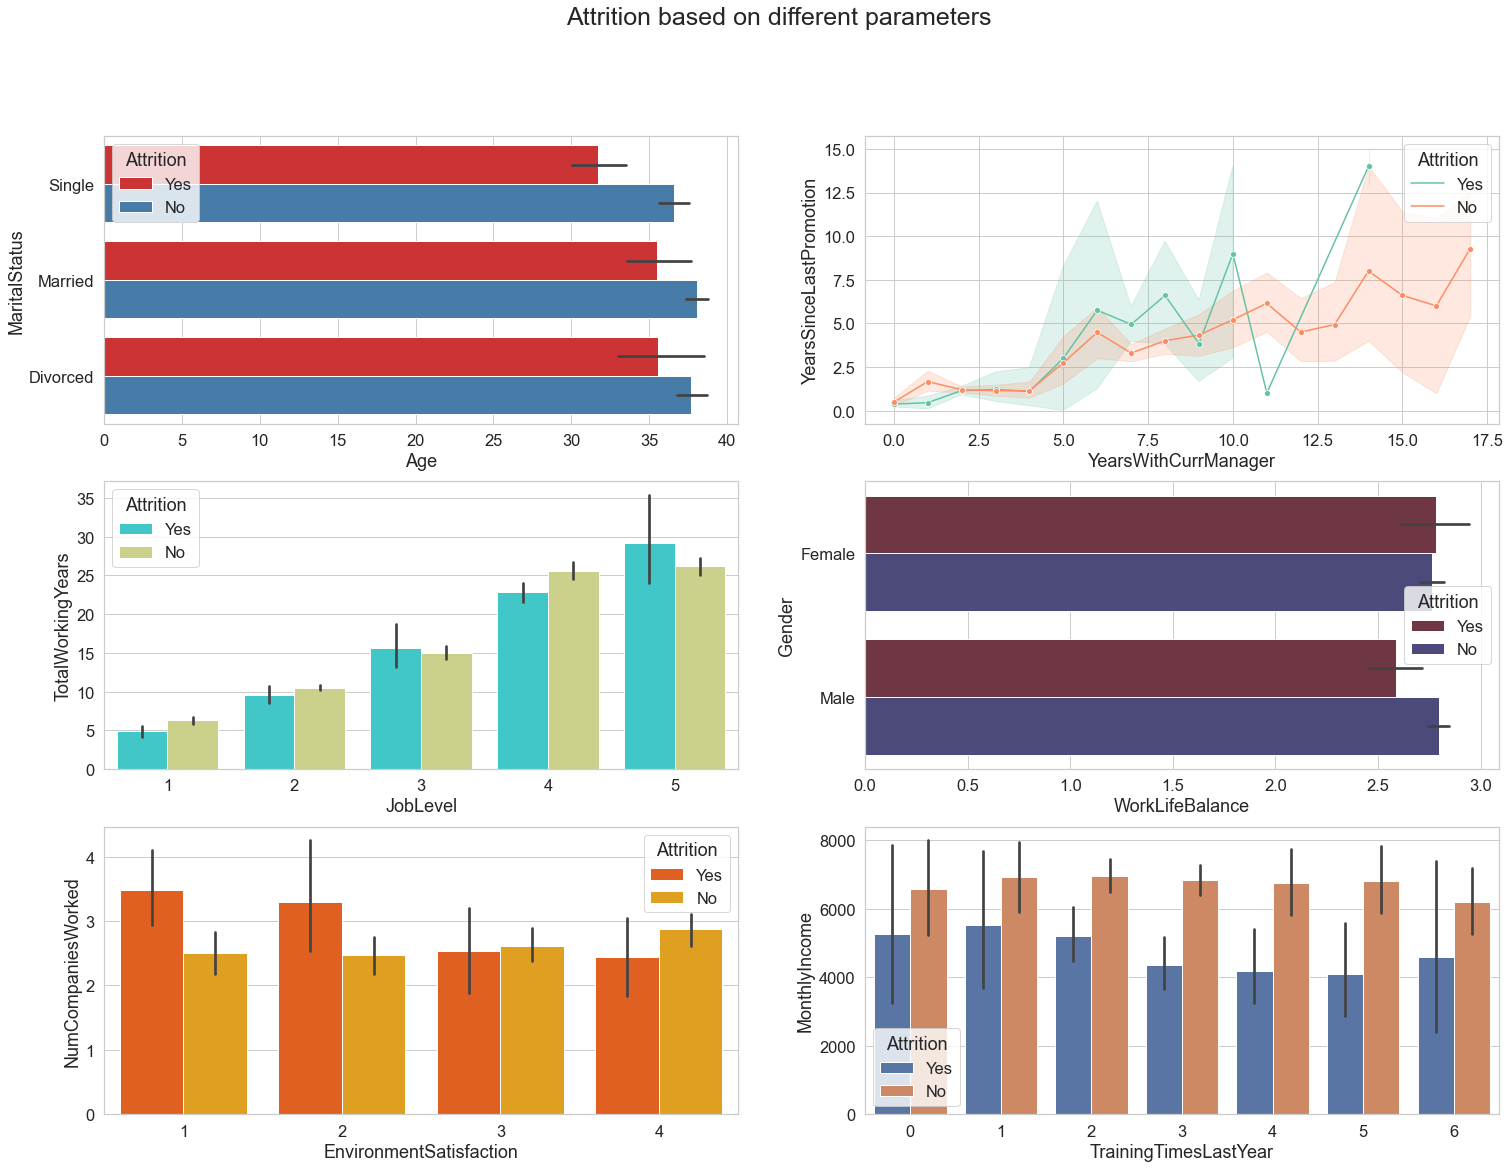

In [15]:
#Plotting Attrition based on diffrent data parameters as it is the target variable
fig,axes = plt.subplots(3, 2, figsize=(25, 18))  #axes is for giving dimensions to the figures we are plotting
#3 means 3 rows and 2 means 2 columns

fig.suptitle('Attrition based on different parameters',fontsize=25)  #Adding a centered title to the figure using suptitle
sns.set_style('whitegrid')

#Plotting Age vs MaritalStatus relationship on the basis of Attrition using barplot
sns.barplot(ax=axes[0, 0],x='Age',y='MaritalStatus',hue='Attrition',data=df,palette="Set1") 
#ax=axes[0,0] means we are plotting the figure on 0th row and 0th column

#Plotting YearsWithCurrManager vs YearsSinceLastPromotion relationship on the basis of Attrition using lineplot
sns.lineplot(ax=axes[0, 1],x='YearsWithCurrManager',y='YearsSinceLastPromotion',hue='Attrition',marker='o',data=df,palette="Set2")
#ax=axes[0,1] means we are plotting the figure on 0th row and 1st column

#Plotting JobLevel vs TotalWorkingYears relationship on the basis of Attrition using barplot
sns.barplot(ax=axes[1, 0],x='JobLevel',y='TotalWorkingYears',hue='Attrition',data=df,palette="rainbow")
#ax=axes[1,0] means we are plotting the figure on 1st row and 0th column

#Plotting WorkLifeBalance vs Gender relationship on the basis of Attrition using barplot
sns.barplot(ax=axes[1, 1],x='WorkLifeBalance',y='Gender',hue='Attrition',data=df,palette="icefire_r")
#ax=axes[1,1] means we are plotting the figure on 1st row and 1st column

#Plotting EnvironmentSatisfaction vs NumCompaniesWorked relationship on the basis of Attrition using barplot
sns.barplot(ax=axes[2, 0],x='EnvironmentSatisfaction',y='NumCompaniesWorked',hue='Attrition',data=df,palette="autumn")
#ax=axes[2,0] means we are plotting the figure on 2nd row and 0th column

#Plotting TrainingTimesLastYear vs MonthlyIncome relationship on the basis of Attrition using barplot
sns.barplot(ax=axes[2, 1],x='TrainingTimesLastYear',y='MonthlyIncome',hue='Attrition',data=df)
#ax=axes[2,1] means we are plotting the figure on 2nd row and 1st column

# Multivariate Analysis

In [16]:
df.describe()    #Statistical summary of the dataset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


As there is no correlation between EmployeeCount and StandardHours, we can drop the columns as it it not helping to analyse the data

In [18]:
#Dropping both the columns
df.drop(columns=['EmployeeCount','StandardHours'],axis=1,inplace=True)

In [19]:
#Checking dataset shape after dropping
df.shape

(1470, 33)

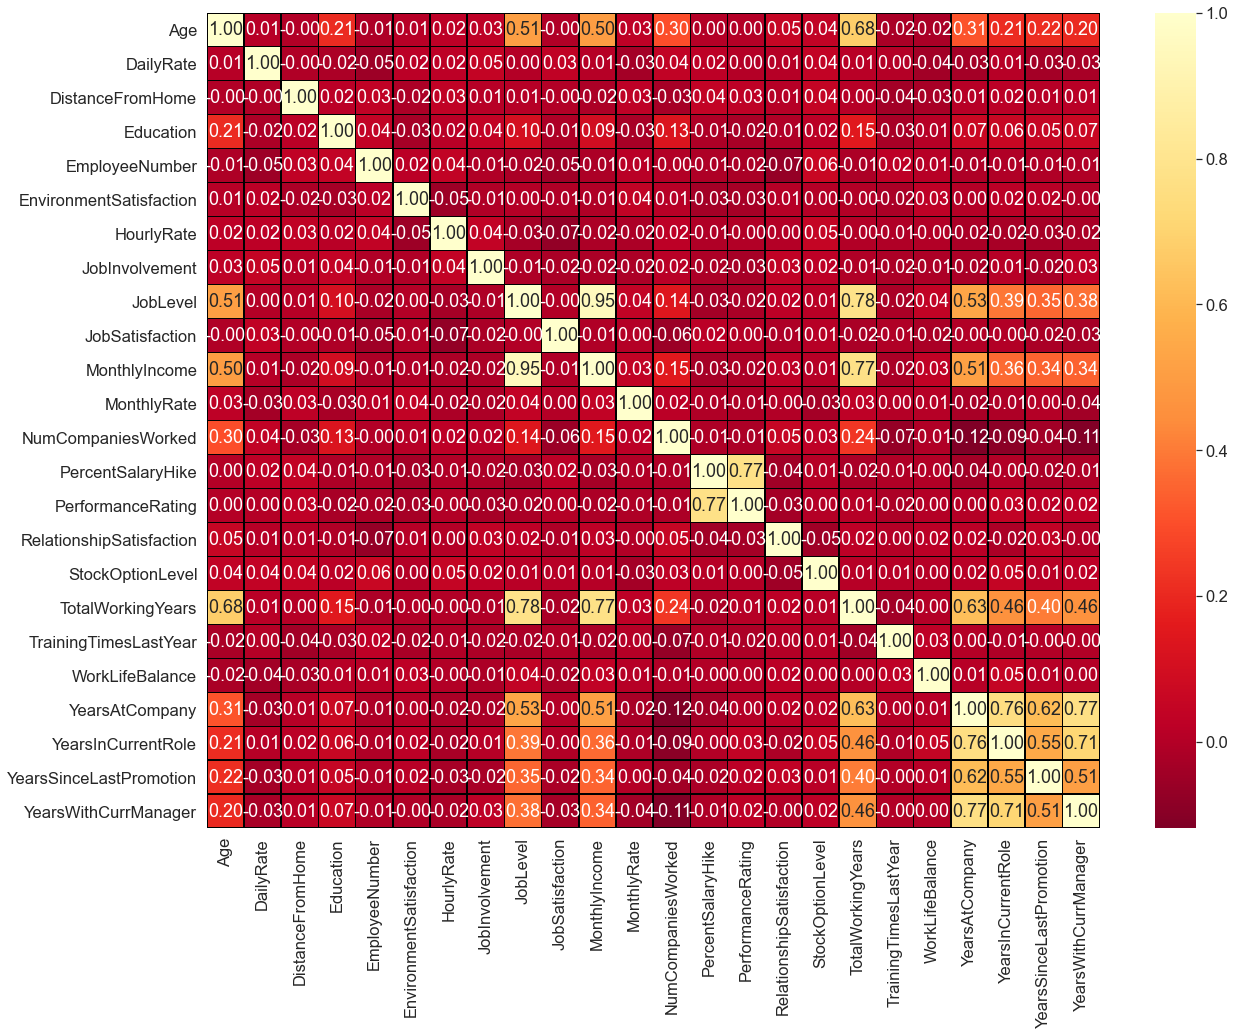

In [20]:
#Plotting heatmap to understand the visualization of correlation
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=.5,cmap="YlOrRd_r",ax=ax,linecolor="black")
plt.show()

# Converting Categorical data into numerical data

As we are sending the data to the model, it takes only the numerical data but not the categorical data. We can convert them by using Label Encoder.

In [21]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Taking the columns to be converted
col=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Over18']
for i in col:
    df[i]=le.fit_transform(df[i])

In [22]:
df.dtypes   

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany

# Checking skewness

In [23]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

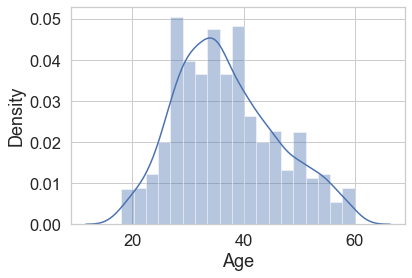

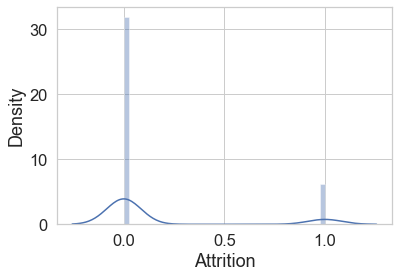

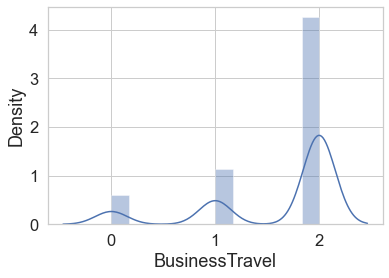

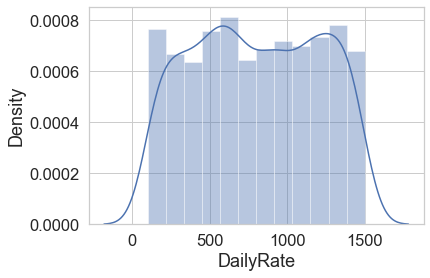

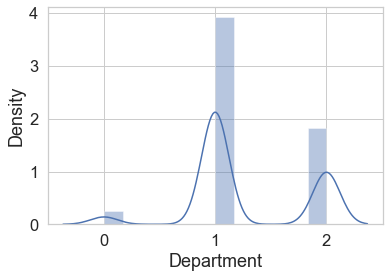

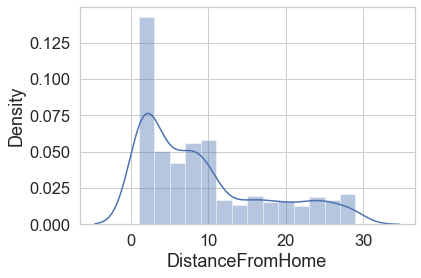

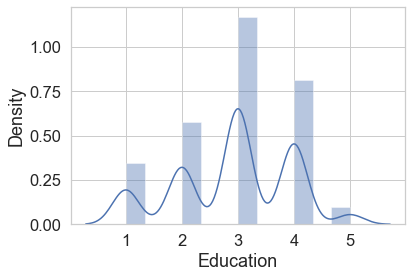

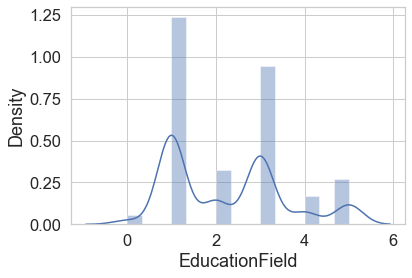

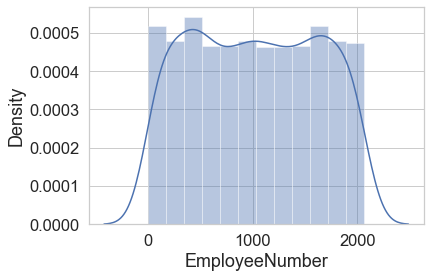

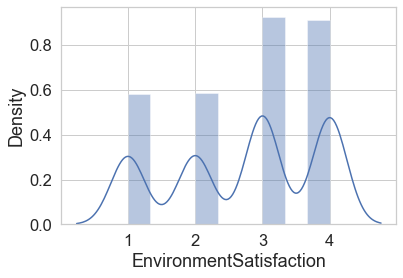

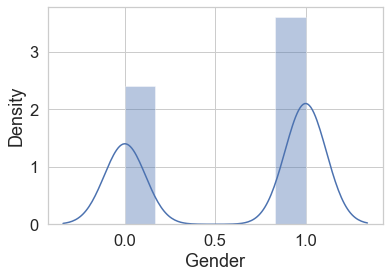

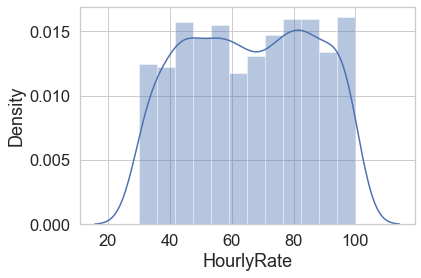

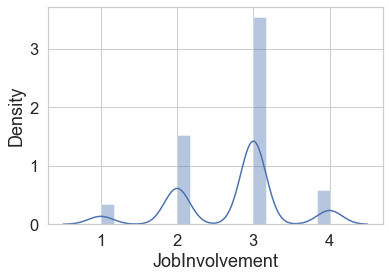

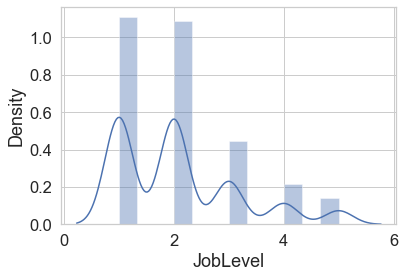

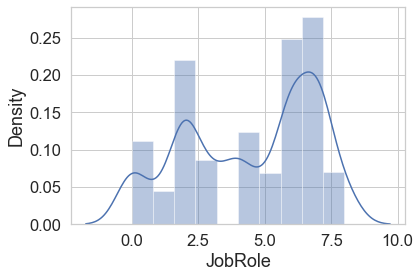

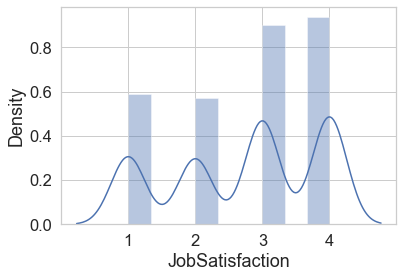

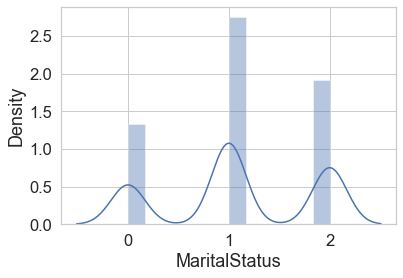

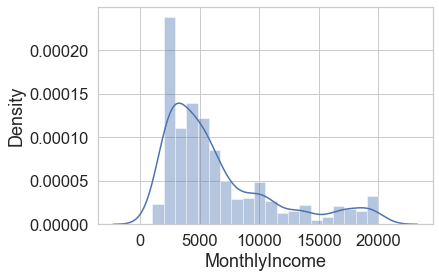

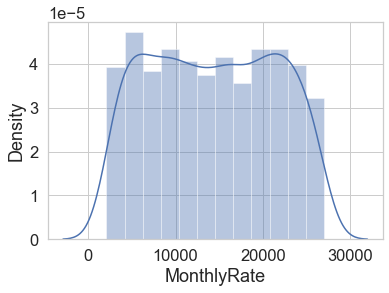

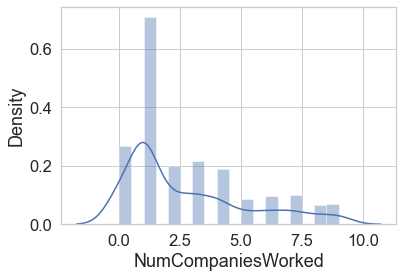

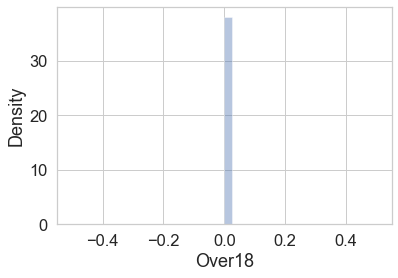

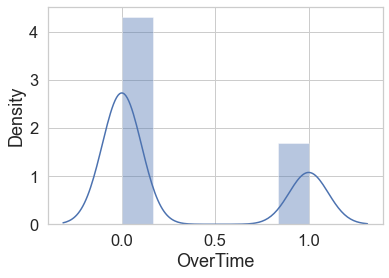

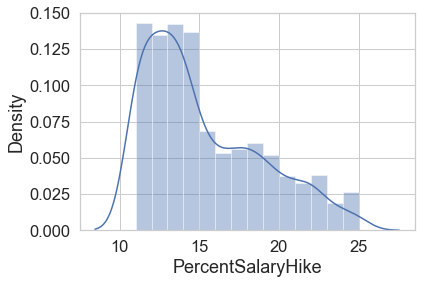

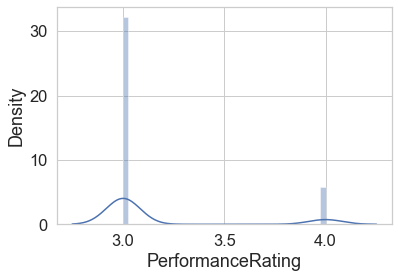

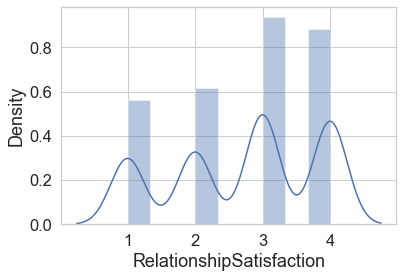

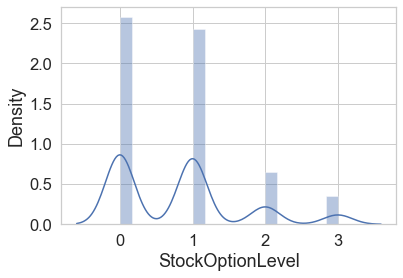

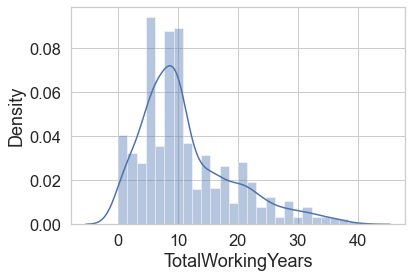

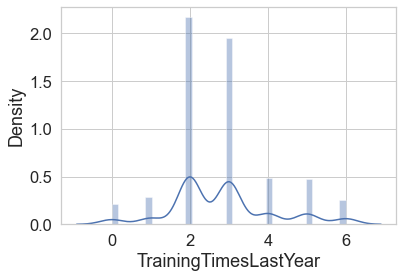

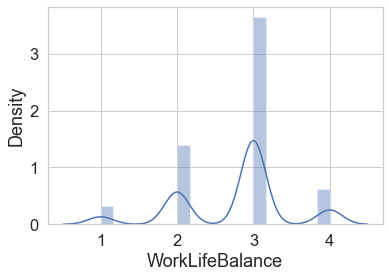

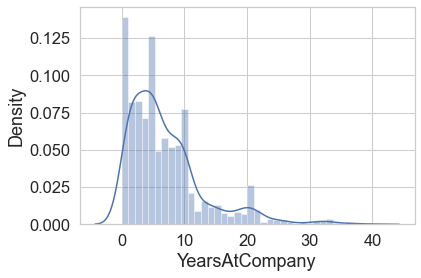

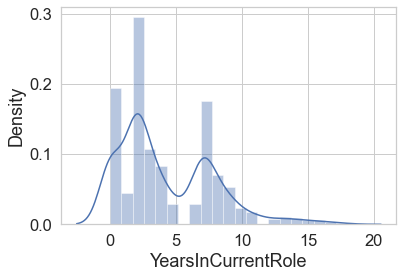

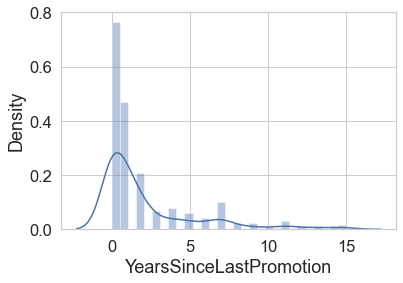

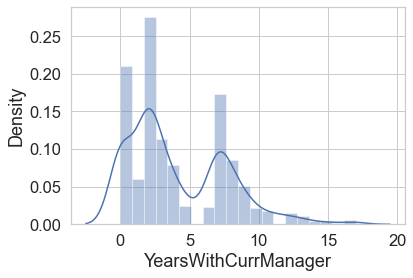

In [24]:
#Checking distribution of data using dist plot
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

# Splitting x and y

In [25]:
df_x=df.drop('Attrition',axis=1)   #Independent variables
y=df['Attrition']    #Dependent or Target Variable

In [26]:
#Checking x data
df_x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,...,3,4,1,6,3,3,2,2,2,2


In [27]:
#Checking y data after splitting
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

# Treating skewness using log-transform

In [28]:
#We are removing skewness from independent variables by using log-transform
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.log1p(df_x[col])

# Preparing dataset for Model Training

In [29]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.505350,-0.891688,-0.958897,-1.701283,-0.660531,-1.224745,...,-0.426230,-1.584178,-1.056106,-0.138921,-3.365435,-2.493820,0.177344,0.290611,-0.973342,0.547996
1,1.322365,-0.913194,-1.297775,-0.493817,0.252002,-1.868426,-0.958897,-1.699621,0.254625,0.816497,...,2.346151,1.191438,0.471284,0.148411,0.305049,0.338096,0.774724,0.882670,-0.117271,0.904924
2,0.008343,0.590048,1.414363,-0.493817,-1.031607,-0.891688,1.239443,-1.696298,1.169781,0.816497,...,-0.426230,-0.658973,-1.056106,-0.307569,0.305049,0.338096,-2.394527,-1.736783,-0.973342,-1.675043
3,-0.429664,-0.913194,1.461466,-0.493817,-0.695482,1.061787,-0.958897,-1.694636,1.169781,-1.224745,...,-0.426230,0.266233,-1.056106,-0.138921,0.305049,0.338096,0.509502,0.882670,0.738799,-1.675043
4,-1.086676,0.590048,-0.524295,-0.493817,-1.031607,-1.868426,0.704083,-1.691313,-1.575686,0.816497,...,-0.426230,1.191438,0.471284,-0.498767,0.305049,0.338096,-0.942513,-0.352871,0.383498,-0.311993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.397995,-0.891688,0.704083,1.721670,0.254625,0.816497,...,-0.426230,0.266233,0.471284,0.853567,0.305049,0.338096,-0.026394,-0.352871,-0.973342,0.044935
1466,0.227347,0.590048,-0.469754,-0.493817,-0.041631,-1.868426,0.704083,1.723332,1.169781,0.816497,...,-0.426230,-1.584178,0.471284,0.011941,1.378597,0.338096,0.353830,0.882670,-0.117271,0.904924
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.434763,0.085049,-0.958897,1.726655,-0.660531,0.816497,...,2.346151,-0.658973,0.471284,-0.498767,-3.365435,0.338096,0.177344,-0.352871,-0.973342,0.044935
1468,1.322365,-0.913194,0.546677,1.401512,-1.031607,0.085049,0.704083,1.728317,1.169781,0.816497,...,-0.426230,1.191438,-1.056106,0.853567,0.305049,-1.077862,0.648755,0.714462,-0.973342,1.051057


We can see that the data has been scaled.

In [30]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
from sklearn.metrics import accuracy_score

In [31]:
#Finding the best random state and accuracy
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training accuracy_score is: ',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy_score is: ',accuracy_score(y_test,pred_test)*100)

At random state 67 ,the model performs well
Training accuracy_score is:  88.09523809523809
Testing accuracy_score is:  88.09523809523809
At random state 217 ,the model performs well
Training accuracy_score is:  88.09523809523809
Testing accuracy_score is:  88.09523809523809
At random state 253 ,the model performs well
Training accuracy_score is:  88.09523809523809
Testing accuracy_score is:  88.09523809523809
At random state 353 ,the model performs well
Training accuracy_score is:  88.43537414965986
Testing accuracy_score is:  88.43537414965986
At random state 427 ,the model performs well
Training accuracy_score is:  88.09523809523809
Testing accuracy_score is:  88.09523809523809
At random state 599 ,the model performs well
Training accuracy_score is:  88.43537414965986
Testing accuracy_score is:  88.43537414965986
At random state 639 ,the model performs well
Training accuracy_score is:  88.43537414965986
Testing accuracy_score is:  88.43537414965986
At random state 718 ,the model perf

We can see at random_state=718, the maximum accuracy score is obtained so that we can create our train_test_split with that value

In [32]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=718,test_size=.20)

# Finding out the best model

In [33]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
#Initializing the instance of the model
LR=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

In [35]:
models= []
models.append(('Logistic Regression',LR))
models.append(('GaussianNB',gnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [36]:
#Importing required modules and metrices
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.8843537414965986


cross_val_score:  0.8802721088435375


roc_auc_score:  0.7108232676414494


Classification report:
 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       242
           1       0.82      0.44      0.57        52

    accuracy                           0.88       294
   macro avg       0.86      0.71      0.75       294
weighted avg       0.88      0.88      0.87       294



Confusion matrix: 

[[237   5]
 [ 29  23]]


AUC_ROC curve:



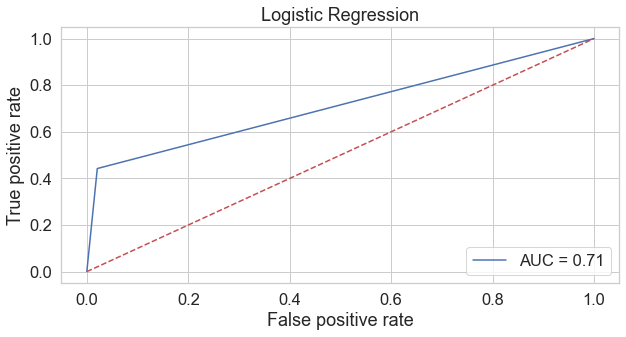





****************************** GaussianNB ***************************


GaussianNB()


accuracy_score:  0.8367346938775511


cross_val_score:  0.8176870748299321


roc_auc_score:  0.719643992371265


Classification report:
 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       242
           1       0.54      0.54      0.54        52

    accuracy                           0.84       294
   macro avg       0.72      0.72      0.72       294
weighted avg       0.84      0.84      0.84       294



Confusion matrix: 

[[218  24]
 [ 24  28]]


AUC_ROC curve:



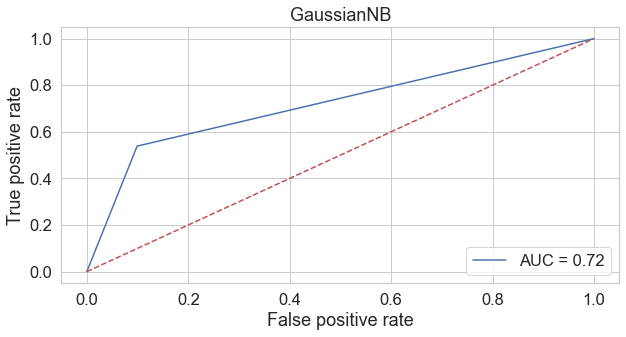





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.7857142857142857


cross_val_score:  0.7782312925170068


roc_auc_score:  0.6131595677050223


Classification report:
 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       242
           1       0.38      0.35      0.36        52

    accuracy                           0.79       294
   macro avg       0.62      0.61      0.62       294
weighted avg       0.78      0.79      0.78       294



Confusion matrix: 

[[213  29]
 [ 34  18]]


AUC_ROC curve:



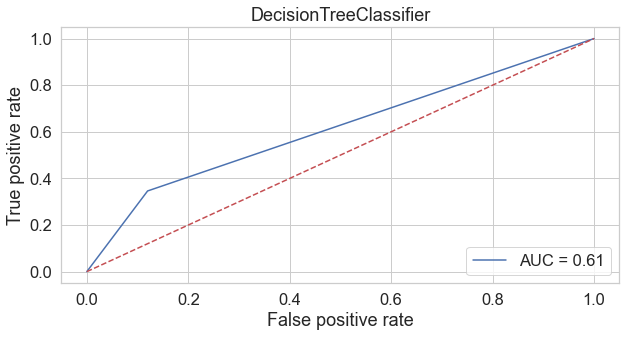





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.8435374149659864


cross_val_score:  0.8496598639455784


roc_auc_score:  0.5576923076923077


Classification report:
 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       242
           1       1.00      0.12      0.21        52

    accuracy                           0.84       294
   macro avg       0.92      0.56      0.56       294
weighted avg       0.87      0.84      0.79       294



Confusion matrix: 

[[242   0]
 [ 46   6]]


AUC_ROC curve:



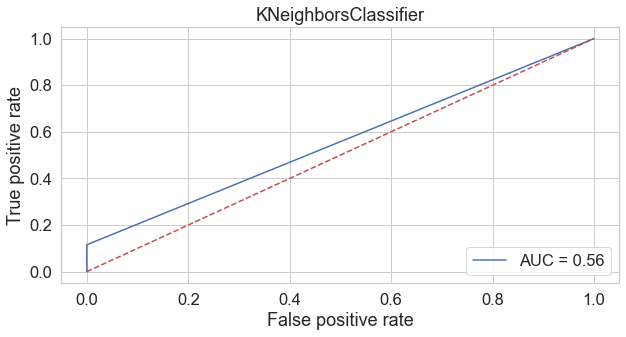

In [37]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [38]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,roc_auc_score
0,Logistic Regression,88.435374,88.027211,71.082327
1,GaussianNB,83.673469,81.768707,71.964399
2,DecisionTreeClassifier,78.571429,77.823129,61.315957
3,KNeighborsClassifier,84.353741,84.965986,55.769231


From the above table, we can say that LogisticRegression is fitting well by giving an accuracy score of 88.43 and cross validation score of 88.02. Now, we will perform HyperparameterTuning to find out the best parameters and improve the accuracy of the model.

# Hyperparameter Tuning

In [39]:
#Creating parameter list to pass in GridSearchCV
parameters={'max_iter':[50,100,150,200,400,500,1000],'penalty':['l1','l2','elasticnet'],
            'C':[1000,100, 10, 1, 0.1, 0.01,0.001],'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [40]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
LR=LogisticRegression()
grid=GridSearchCV(LR,parameters,cv=10,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
0.8750036216137913


In [47]:
#Using the best parameters obtained above
LR=LogisticRegression(C=0.1,max_iter=50,penalty='l2',solver='newton-cg')
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('Final Accuracy after tuning is: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()*100)

Final Accuracy after tuning is:  88.77551020408163
Cross validation score:  87.6190476190476


We can see that our accuracy score got decreased after HyperParamter Tuning. For boosting the accuracy score, we can use Ensemble Techniques like RandomForestClassifier and AdaBoostClassifier

# Ensemble Techniques for boosting the score

In [41]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=353)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000,1200],'criterion' :['gini', 'entropy']}
grid=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  
print(grid.best_score_) 

{'criterion': 'gini', 'n_estimators': 10}
0.8622394518571944


In [42]:
#Using the best parameters obtained
RF=RandomForestClassifier(random_state=353,criterion='entropy',n_estimators=1000)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  84.6938775510204
Cross validation score:  86.05442176870748


In [43]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(random_state=353)   #Using the best random state we obtained
parameters={'n_estimators':[50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1]}
grid=GridSearchCV(adc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  
print(grid.best_score_) 

{'learning_rate': 0.1, 'n_estimators': 500}
0.8716227912008655


In [44]:
#Using the best parameters obtained
adc=AdaBoostClassifier(random_state=353,n_estimators=500,learning_rate=0.1)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adc,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  85.71428571428571
Cross validation score:  86.4625850340136


We can observe that LogisticRegression is the best algorithm.

# Finalizing the model

In [48]:
LR_prediction=LR.predict(x)
print('Predictions of LogisticRegression: ',LR_prediction)

Predictions of LogisticRegression:  [1 0 0 ... 0 0 0]


In [49]:
#Saving the model
import joblib
joblib.dump(LR,'HR_Anaytics.pkl')

['HR_Anaytics.pkl']